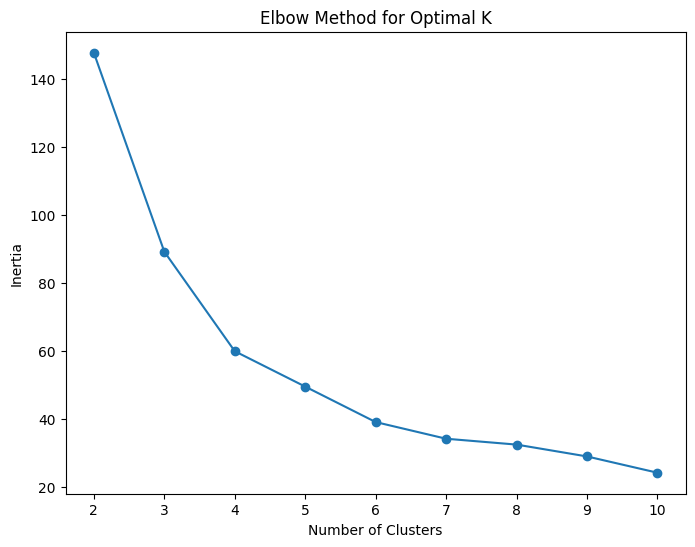

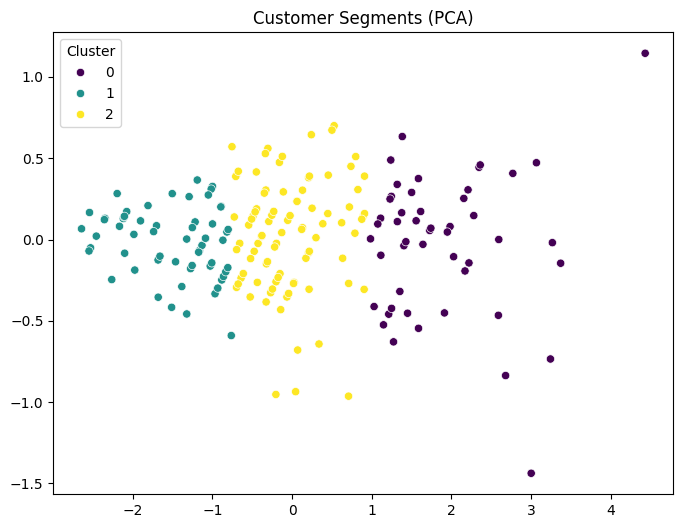

Silhouette Score: 0.4462982329382278
Davies-Bouldin Index: 0.7086602453786267


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Customer and Transaction Data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Clean column names to remove extra spaces
customers_df.columns = customers_df.columns.str.strip()
transactions_df.columns = transactions_df.columns.str.strip()

# Aggregate Transaction Data (e.g., Total Spend and Total Quantity)
transaction_features = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Merge Customer Profiles with Transaction Features
customer_profiles = pd.merge(customers_df, transaction_features, on='CustomerID')

# Check the first few rows of the merged customer_profiles DataFrame
customer_profiles.head()

# Standardize the Features (Scaling Data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])

# Elbow Method to Find Optimal Number of Clusters (2 to 10)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the number of clusters (3 clusters in this case based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters Using PCA (2D Visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_profiles['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA)')
plt.show()

# Calculate Clustering Metrics
sil_score = silhouette_score(scaled_data, customer_profiles['Cluster'])
db_index = davies_bouldin_score(scaled_data, customer_profiles['Cluster'])

# Print Clustering Metrics
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')

# Save the Clustering Results to a CSV file
customer_profiles.to_csv('Gargi_Giri_Clustering.csv', index=False)
